<h1><center>MDI343 / MDI724 - TP Avazu<center></h1>

<strong>Student 1 :</strong> Valentin LARRIEU (valentin.larrieu@telecom-paristech.fr)
<br>
<strong>Student 2 :</strong> Arnaud LEJEUNE (arnaud.lejeune@telecom-paristech.fr)

<font color="red">**Question 0:**
    Import the needed packages: numpy, pandas etc..
</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
SEED = 100

# The dataset

<font color="red">**Question 1:**
    Load the data into a pandas DataFrame and display the first lines with the ".head()" method.
    <br>
</font>
**Remark**: the features meaning is available at https://www.kaggle.com/c/avazu-ctr-prediction/data

In [3]:
df = pd.read_csv('./train-1000000', sep=',')

In [4]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,3.983206e+18,0,14102915,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,2,4687,320,50,423,2,39,100148,32
1,7.756884e+18,0,14103007,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,0,0,17894,320,50,2039,2,39,100077,32
2,6.941774e+17,0,14102711,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,1,0,22684,320,50,2619,1,163,100055,71
3,2.664154e+18,1,14102903,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,1,0,23222,320,50,2676,0,35,100176,221
4,1.480510e+19,0,14102902,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,1,0,8330,320,50,761,3,175,100081,23


<font color="red">**Question 2:**
    What is the 'click' frequency in the dataset?
    <br>
</font>

In [5]:
click_freq = np.sum(df['click'])/len(df['click'])
print("The click frequency is: ", click_freq)

The click frequency is:  0.169971


We note that the Avazu dataset is very unbalanced. The 'click' class represents less than a fifth of the whole database. We already know that a classifier always predicting <i>'click' = 0</i> will have good performances in terms of error rate (around 0.17). 
<br>
The ROC and lift curves will be better performance metrics.

<font color="red">**Question 3:**
    What are the categorical features? Using the 'df.dtypes' method, compute the number of distincts values for each of these features.
</font>

In [6]:
toShow = pd.DataFrame(index = df.columns)

for col in df.columns:
    toShow.loc[col, 'Column type'] = df[col].dtype
    toShow.loc[col, 'Column unique values'] = len(df[col].unique())
    
toShow

,Column type,Column unique values
id,float64,1000000.0
click,int64,2.0
hour,int64,240.0
C1,int64,7.0
banner_pos,int64,7.0
site_id,object,2651.0
site_domain,object,2871.0
site_category,object,22.0
app_id,object,3157.0
app_domain,object,198.0


All variables apart from <i>'id'</i> can be considered categorical

<font color="red">**Question 4:**
    If one does a dummy encoding of all categorical variables, what would be the dimension of the model?
    In other words: what would be the dimension of our big feature vector encoded with dummies. 
    <br>
</font>

Each column is categorical. If we encode them with dummies the dimension of the encoded vector would be :

In [7]:
sum = 0
for col in df.columns:
    if col!="id":
        sum = sum + len(df[col].unique())
print("Dimension of the encoded vector would be : ", sum)

Dimension of the encoded vector would be :  723080


<font color="red">**Question 5:**
    Analyze the 'hour' column: which format is used? How can we transform/simply this feature?
</font>

In [8]:
print(df['hour'].head()) 
print(df['hour'].tail()) 

0    14102915
1    14103007
2    14102711
3    14102903
4    14102902
Name: hour, dtype: int64
999995    14102602
999996    14102101
999997    14102318
999998    14102908
999999    14102600
Name: hour, dtype: int64


In [9]:
# We could use the datetime library of pandas to get the hour and then construct 
# other columns with hours, days and so on

pd.to_datetime(df['hour'], format = "%y%m%d%H").head()

0   2014-10-29 15:00:00
1   2014-10-30 07:00:00
2   2014-10-27 11:00:00
3   2014-10-29 03:00:00
4   2014-10-29 02:00:00
Name: hour, dtype: datetime64[ns]

The hour format is in the following format :  <i>yy/mm/dd/HH</i> (year/month/day/hour)

<font color="red">**Question 6:**
    Run and understand the following script.
</font>

In [10]:
import datetime
def datesplit(originalDate):
    originalDate = str(originalDate)
    
    year = int("20" + originalDate[0:2])
    month = int(originalDate[2:4])
    day = int(originalDate[4:6])
    hour = int(originalDate[6:8])
    
    return datetime.datetime(year, month, day, hour)

# Exemple :
datesplit(14102915).weekday(), datesplit(14102915).hour

(2, 15)

We slice the data to get the year (adding 20 to have the good year, the month, day and hour.
Then we use the datetime function wich will contruct our datetime object with those arguments.
After that we print the day corresponding (2 so wednesday since 0 is moday) and the hour 15

<font color="red">**Question 7:**
    Using the ".apply( ... )" method, create a 'weekday' for the day of the week. Then, replace the 'hour' column by the hour.
</font>

To answer this question you have to understand that applies takes a function as argument
<br>
"lambda x: ... " is used to create local unamed function of x
<br>
Check the documentation: https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions

In [11]:
df['weekday'] = df['hour'].apply(lambda x : datesplit(x).weekday())
df['hour'] =  df['hour'].apply(lambda x : datesplit(x).hour)

In [12]:
df[['weekday', 'hour']].head()

,weekday,hour
0,2,15
1,3,7
2,0,11
3,2,3
4,2,2


<font color="red">**Question 8:**
    Using the ".groupby( ... )" method, visualize the influence of the hour and of the day on the 'click' frequency. To do so, plot 'click' vs 'hour' and 'click' vs 'weekday' curves.
</font>

In [13]:
df_hours = pd.DataFrame(df.groupby('hour')["click"].mean()) # Fill here for the influence of the hour
df_hours.T

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
click,0.182707,0.185734,0.175552,0.175367,0.159664,0.162126,0.169315,0.17749,0.163418,0.159042,...,0.178075,0.183737,0.180076,0.173271,0.164072,0.165725,0.158402,0.162384,0.166847,0.170733


In [14]:
df_weekday = pd.DataFrame(df.groupby('weekday')["click"].mean()) # Fill here for the influence of the weekday
df_weekday.T

weekday,0,1,2,3,4,5,6
click,0.183143,0.161577,0.158675,0.173795,0.173392,0.183995,0.183105


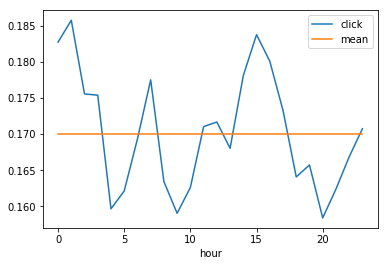

In [15]:
df_hours['mean'] = df['click'].mean()

df_hours.plot()
plt.show()

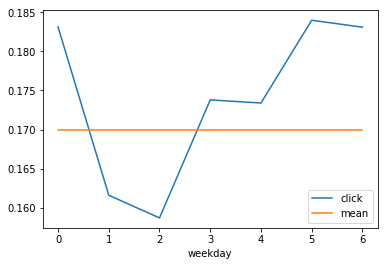

In [16]:
df_weekday['mean'] = df['click'].mean()

df_weekday.plot()
plt.show()

<strong>Additional plots</strong>

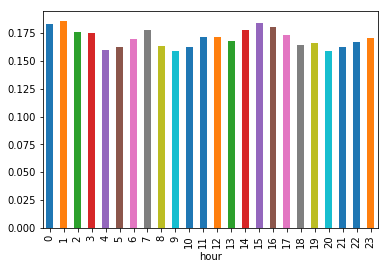

In [17]:
df_hours['click'].plot(kind="bar")
plt.show()

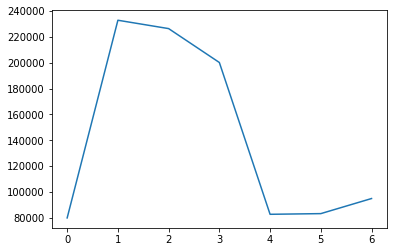

In [18]:
week_plot = df.groupby('weekday')['click'].count()  # Fill here for the influence of the day
plt.plot(week_plot)
plt.show()

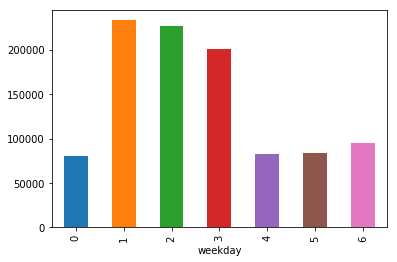

In [19]:
week_plot.plot(kind="bar")
plt.show()

<font color="red">**Question 9:**
    Explain what the axes stand for and try to interpret the shape of the obtained curves.
</font>

<strong>Hour : </strong> <br>
    X axis represents hours of the day and Y axis the click frequency mean. A significant click rate is noticeable in the morning, around 7 to 9pm, relating to people commuting in public transports and using their phones. The same phenomenon can be observed around the end of the afternoon, for the commute back home. Lastly, there is a 3rd peak in late evening / beginning of the night : it probably represents a more and more common habits of people using their phones in their bed, right before going to sleep.

<strong>Weekday : </strong> <br>
X axis represents the days of the week and Y axis the click frequency mean as well. Here, the distribution seems to be in 2 phases : a strong clickrate phase centered on the week-end, starting at the end of the working week (from Thursdays / Fridays) and finishing on mondays. Then, a weak phase centered on Tuesdays and Wednesdays. Thus, people seem to use their phones a lot more in the week-ends and close to them rather than in the middle of the week. 

# Preliminary work and first model

Start by understanding the features with few modalities:
'hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21'.

<font color="red">**Question 10:**
    For instance, inspect the columns 'C15' (dimension of the advert) and 'site_category': visualize the clicks mean.
</font>

In [20]:
df_C15 = pd.DataFrame(df.groupby('C15')["click"].mean()) # Fill here: inspect 'C15' using '.groupby'
df_C15.T

C15,120,216,300,320,480,728,768,1024
click,0.033708,0.129612,0.360537,0.158767,0.285714,0.054144,0.375,0.166667


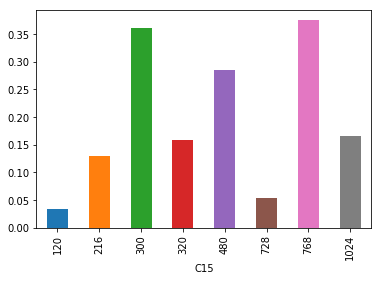

In [21]:
df.groupby('C15')['click'].mean().plot(kind="bar")
plt.show()

In [22]:
df_site_category = pd.DataFrame(df.groupby('site_category')["click"].mean()) # Fill here: inspect 'site_category' using '.groupby'
df_site_category.T 

site_category,0569f928,28905ebd,335d28a8,3e814130,42a36e14,50e219e0,5378d028,70fb0e29,72722551,75fa27f6,...,9ccfa2ea,a818d37a,bcf865d9,c0dd3be3,c706e647,da34532e,dedf689d,e787de0e,f028772b,f66779e6
click,0.053613,0.208076,0.089824,0.284245,0.225806,0.128597,0.0,0.144737,0.059172,0.111305,...,0.0,0.0,0.0,0.128655,0.0,0.0,0.530449,0.0,0.179719,0.034564


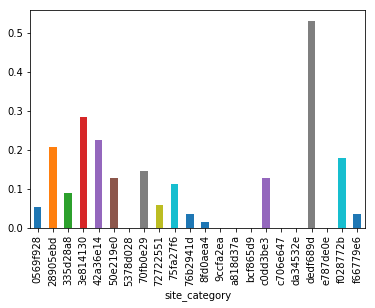

In [23]:
df.groupby('site_category')['click'].mean().plot(kind="bar")
plt.show()

<font color="red">**Question 11:**
    Some site categories have a null click rate. Why? Display the 'count()' of each modality.
    <br><br>
    Hint: you can use the method ".value_counts()"
</font>

In [24]:
df_q11 = pd.DataFrame(df.groupby('site_category')['click'].value_counts())
df_q11.columns = ['Value Count']
df_q11

Value Count
site_category click             
0569f928      0              406
              1               23
28905ebd      0           144146
              1            37874
335d28a8      0             3050
              1              301
3e814130      0            54159
              1            21508
42a36e14      0               48
              1               14
50e219e0      0           356335
              1            52586
5378d028      0               11
70fb0e29      0              520
              1               88
72722551      0              636
              1               40
75fa27f6      0             3561
              1              446
76b2941d      0             2481
              1               92
8fd0aea4      0              186
              1                3
9ccfa2ea      0                5
a818d37a      0               81
bcf865d9      0               16
c0dd3be3      0              894
              1              132
c706e647      0                1
da34532e      0                1
dedf689d      1              331
              0              293
e787de0e      0               28
f028772b      0           257026
              1            56313
f66779e6      0             6145
              1              220

We can see here that some site categories have a null click rate.

It is practical to visualize both columns in parallel:

In [25]:
col = 'site_category'
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'count']
a.sort_values(by='count', ascending=False).tail(10)

,mean,count
site_category,,
0569f928,0.053613,429.0
8fd0aea4,0.015873,189.0
a818d37a,0.000000,81.0
42a36e14,0.225806,62.0
e787de0e,0.000000,28.0
bcf865d9,0.000000,16.0
5378d028,0.000000,11.0
9ccfa2ea,0.000000,5.0
c706e647,0.000000,1.0


This table shows that the site categories that have a null click rate also have low counts. It means they do not appear much in the dataset and thus the click rate calculated might not be relevant as there is not enough instances of it.

<font color="red">**Question 12:**
    Divide the dataset into a training (90%) and test set (10%) with sklearn (use the following option: random_state=100).
</font>

In [26]:
SEED = 100
#df2 = df.copy()
#df2 = df2.drop("id", axis=1)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    df.iloc[:,2:], df['click'], test_size=0.1, random_state = SEED)

In [27]:
print('Train shape : ' + str(Xtrain.shape))
print('Test shape : ' + str(Xtest.shape))

Train shape : (900000, 23)
Test shape : (100000, 23)


# First work on a reduced number of features

<font color="red">**Question 13:**
    Put in a list the selected columns: 'hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21'.
</font>

In [28]:
some_columns = ['hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 
                'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21']
slice_df = df[some_columns]

slice_df.head()

,hour,weekday,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C15,C16,C18,C21
0,15,2,1005,1,f028772b,07d7df22,1,2,320,50,2,32
1,7,3,1002,0,50e219e0,07d7df22,0,0,320,50,2,32
2,11,0,1005,0,50e219e0,cef3e649,1,0,320,50,1,71
3,3,2,1005,0,50e219e0,0f2161f8,1,0,320,50,0,221
4,2,2,1005,1,f028772b,07d7df22,1,0,320,50,3,23


<font color="red">**Question 14:**
    <br>
    - Import OneHotEncoder from sklearn.preprocessing
    <br>
    - Transform the training and the test data restricted to the selected columns
    <br>
    - Give the type of the outputs.
</font>

In [29]:
# As some variables are in a hex-like format, we must first encode these labels

from sklearn.preprocessing import LabelEncoder

site_categ_label = LabelEncoder().fit(Xtrain['site_category'])
app_categ_label = LabelEncoder().fit(Xtrain['app_category'])

Xtrain['site_category'] = site_categ_label.transform(Xtrain['site_category'])
Xtrain['app_category'] = app_categ_label.transform(Xtrain['app_category'])
Xtest['site_category'] = site_categ_label.transform(Xtest['site_category'])
Xtest['app_category'] = app_categ_label.transform(Xtest['app_category'])

In [30]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder().fit(Xtrain[some_columns])

Xtrain_oh = ohe.transform(Xtrain[some_columns]) # fit the transformation of Xtrain restricted to selected columns
Xtest_oh = ohe.transform(Xtest[some_columns]) # and transform Xtest restricted to selected columns

We encoded the columns, each will have a 0 or a 1 for each different value of the column

<font color="red">**Question 15:**
    What is the new number of features?
</font>

In [31]:
print("Number of features :" ,Xtrain_oh.shape[1])

Number of features : 183


<font color="red">**Question 16:**
    Visualize the first row of the design matrix you have got.
</font>

In [32]:
Xtrain_oh.toarray()[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<font color="red">**Question 17:**
    Import and fit a logistic regression model on your the encoded data
</font>

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = SEED)
lr.fit(Xtrain_oh,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=100, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<font color="red">**Question 18:**
    With '.predict' and 'predict_proba', display the hard and soft decision you get on test data.
</font>

In [34]:
hard = lr.predict(Xtest_oh)
pd.DataFrame(hard).T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
soft = lr.predict_proba(Xtest_oh)
pd.DataFrame(soft).T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,0.758081,0.733943,0.796839,0.919757,0.750792,0.867931,0.897848,0.871539,0.874977,0.917236,...,0.7905,0.882495,0.858748,0.974013,0.832503,0.853762,0.9025,0.792495,0.785688,0.878495
1,0.241919,0.266057,0.203161,0.080243,0.249208,0.132069,0.102152,0.128461,0.125023,0.082764,...,0.2095,0.117505,0.141252,0.025987,0.167497,0.146238,0.0975,0.207505,0.214312,0.121505


<font color="red">**Question 19:**
    Compute the probability of **error** using sklearn.metrics 'accuracy_score' function. Comment.
    
</font>

In [36]:
from sklearn.metrics import accuracy_score
hard_score_selected = accuracy_score(ytest, hard)
print("Hard score ", hard_score_selected)

Hard score  0.83043


The score is 83% : it is a pretty bad score considering there is a 17% click rate. As <i>1 - 0.17 = 0.83</i>, it means it's like if our classifier only predicted everytime no click

<font color="red">**Question 20:**
    Which sklearn.metrics could you also use?
</font>

We could for instance use balanced_accuracy_score or any other metric using the same arguments

<font color="red">**Question 21:**
    Plot the ROC curve. Then compute the log loss and the Area Under the Curve ROC.
</font>

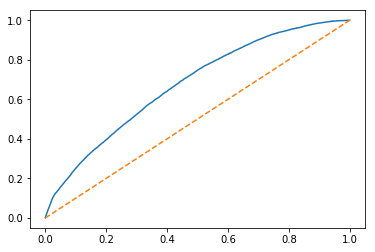

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve
#roc_curve(ytest,soft[:,1])
#plt.plot(roc_curve(ytest,soft[:,1]))

#from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(ytest,  soft[:,1])
plt.plot(fpr,tpr, '-')
plt.plot([0,1],[0,1], linestyle='--')
plt.show()

In [38]:
from sklearn.metrics import log_loss , roc_auc_score 
log_loss_selected = log_loss(ytest, soft[:,1]), roc_auc_score(ytest, soft[:,1])
print("Log loss : ", log_loss_selected)

Log loss :  (0.4251224554680983, 0.6762758103988586)


In [39]:
roc_feature_selected = roc_auc_score(ytest, soft[:,1])
print("Area under roc curve : ", roc_feature_selected)

Area under roc curve :  0.6762758103988586


<font color="red">**Question 22:**
    <br>
    - Import the 'plot_lift' function from 'utils.py' and plot the lift curve. What is the lift of the first fifth of the population identified by the test?
    <br>
    -  Interpret it. 
</font>

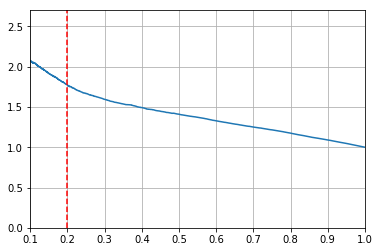

In [40]:
from utils import plotlift
plotlift(ytest, soft[:,1])
# The following line just plots a vertical line for you to answer the second part of the question
plt.axvline(x= 0.2 , linestyle='--', color='r') # Fill here
plt.show()

The lift of the fifth of the population is aproximatly 1.8

It shows that on the first fifth of the population, the model performs at least 1.8 times better than random guess

# Complete model

As an example, we now work on the 'site_id' column.
<font color="red">**Question 23:**
    <br>
    - For each modality, compute the number of occurrences in the dataset and the average of clicks for this modality 
    <br>
    - With 'sns.joiplot', represent the set of points (count, mean) for each modality
</font>

In [41]:
import seaborn as sns

/home/arnaud/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/arnaud/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/arnaud/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/arnaud/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternat

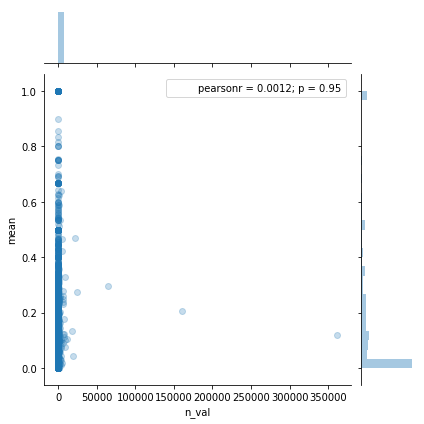

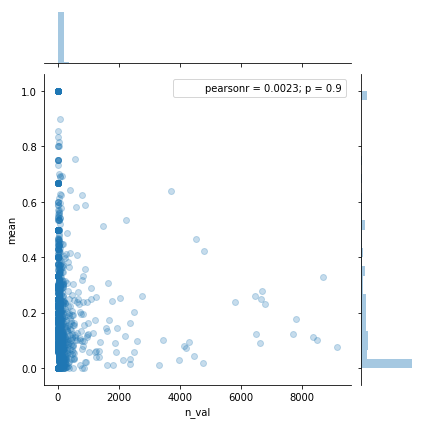

In [42]:
col = 'site_id'
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'n_val']
sns.jointplot(a['n_val'], a['mean'], alpha=0.25)
thres = 10000
sns.jointplot(a[a['n_val']<thres]['n_val'], a[a['n_val']<thres]['mean'], alpha=0.25);

<font color="red">**Question 24:**
    In the above commands, what does the alpha parameter stand for?
</font>

Alpha is the transparency

Several sites with a lot of occurrences in the dataset have a click frequency very different from the mean. It is relevant to keep the column 'site_id' at least for the modalities for which 'count' is very high.
<font color="red">**Question 25:**
    Do the same work on the 'device_id' column. What do you notice? What could be the isolated point?
</font>

/home/arnaud/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/arnaud/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/arnaud/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/arnaud/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternat

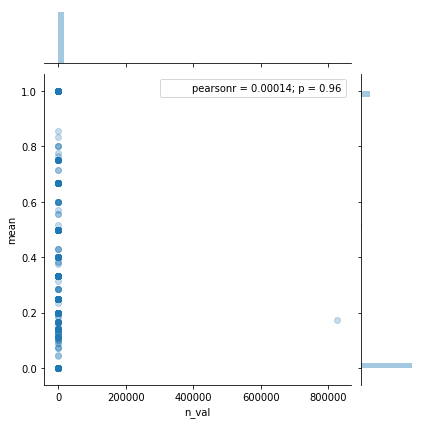

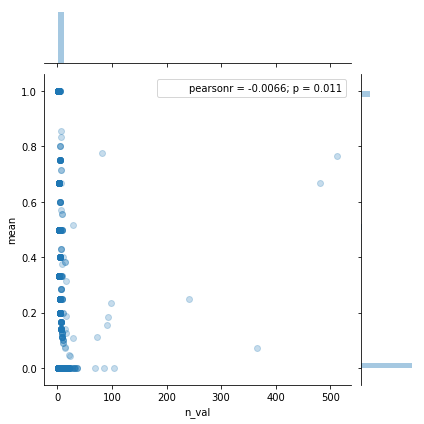

In [43]:
col = 'device_id'
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'n_val']
sns.jointplot(a['n_val'], a['mean'], alpha=0.25);
thres = 10000
sns.jointplot(a[a['n_val']<thres]['n_val'], a[a['n_val']<thres]['mean'], alpha=0.25);

We can see an isolated value on the first plot (X ~ 800000 and Y~ 0.2)

In [44]:
a[a['n_val']>1000]

,mean,n_val
device_id,,
a99f214a,0.174347,824918.0


This isolated point shows that 82% of device have the same id. We haven't found enough data on what those id represent but it might represent all unknown values

<font color="red">**Question 26**:   
    In the column df['device_id'], spot the value V corresponding to the largest number of 'count' (using '.value_counts' method). Create a new column df['user'] defined as follows:
</font>
$$
\text{user} = \left\{\begin{array}[h]{ll} \text{device_ip + device_model} & \text{if device_id = V}\\ \text{device_id} & \text{else.}\end{array}\right.
$$

In [45]:
V = pd.DataFrame(df.groupby('device_id').count()['click']).sort_values(by='click', ascending=False).reset_index().iloc[0,0]
V

'a99f214a'

In [46]:
df['user'] = np.where(df['device_id']==V, df['device_ip']+df['device_model'] , df['device_id'])
df['user'].head(10)

0    fb6566d3be87996b
1            9b7af851
2    748e298a3c55fad5
3    a50da3d4c5cc73c1
4    d5f88679a5bce124
5    189590f92ea4f8ba
6            192d98b0
7    342b6e9ea0f5f879
8            50dc7a55
9            feb99a64
Name: user, dtype: object

<font color="red">**Question 27**:
    Drop the following columns: 'device_id','device_model','device_ip'
</font>

In [47]:
df = df.drop(['device_id','device_model','device_ip'], axis=1)
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,weekday,user
0,3.983206e+18,0,15,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,4687,320,50,423,2,39,100148,32,2,fb6566d3be87996b
1,7.756884e+18,0,7,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,17894,320,50,2039,2,39,100077,32,3,9b7af851
2,6.941774e+17,0,11,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,22684,320,50,2619,1,163,100055,71,0,748e298a3c55fad5
3,2.664154e+18,1,3,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,23222,320,50,2676,0,35,100176,221,2,a50da3d4c5cc73c1
4,1.480510e+19,0,2,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,8330,320,50,761,3,175,100081,23,2,d5f88679a5bce124


<font color="red">**Question 28**:
    One could look at the similarity between 'site_id' and 'site_domain'. Merge those columns into a new 'site' column and delete the old 'site_id' and 'site_domain' columns.
</font>

In [48]:
df['site'] = np.where(df['site_id']==df['site_domain'], df['site_id'] , df['site_id']+df['site_domain'])
df = df.drop(['site_id','site_domain'], axis=1)

In [49]:
df['site'].head(10)

0    e151e2457e091613
1    cb809abf74acf31a
2    85f751fdc4e18dd6
3    85f751fdc4e18dd6
4    791b5571fd13bc73
5    85f751fdc4e18dd6
6    85f751fdc4e18dd6
7    85f751fdc4e18dd6
8    85f751fdc4e18dd6
9    85f751fdc4e18dd6
Name: site, dtype: object

<font color="red">**Question 29**:
    Once again, split the modified DataFrame df into a train (90%) and a test set (10%) (with option: random_state = 100).
</font>

In [50]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    df.iloc[:,2:], df['click'], test_size=0.1, random_state = SEED)

<font color="red">**Question 30**:
    Define a OneHotEncoder and then, 'fit_transform' the train set.
</font>

In [51]:
# First we need to define labelEncoders for encoding categorical columns

data = Xtrain.append(Xtest, ignore_index = True, sort = False)

site_categ_label = LabelEncoder().fit(data['site_category'])
app_categ_label = LabelEncoder().fit(data['app_category'])
app_id = LabelEncoder().fit(data['app_id'])
app_domain = LabelEncoder().fit(data['app_domain'])
user_label = LabelEncoder().fit(data['user'])
site_label = LabelEncoder().fit(data['site'])
data['site_category'] = site_categ_label.transform(data['site_category'])
data['app_category'] = app_categ_label.transform(data['app_category'])
data['app_id'] = app_id.transform(data['app_id'])
data['app_domain'] = app_domain.transform(data['app_domain'])
data['user'] = user_label.transform(data['user'])
data['site'] = site_label.transform(data['site'])
data['C20'] = data['C20'].abs()

Xtrain = data.iloc[:Xtrain.shape[0],:]
Xtest = data.iloc[Xtrain.shape[0]:,:]

In [52]:
Xtest.shape

(100000, 20)

NOTE : Here we're using Xtrain & Xtest values to fit the labelEncoders as there are some values in Xtest that are not in Xtrain. We could have used df directly to simply the process, but it wouldn't have made sense in a real situation so we preferred to add both sets into a data variable and work on it

In [53]:
#some_columns = ['hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 
#                'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21','site','user']
# We add site and user to the selected columns

#ohe = OneHotEncoder(handle_unknown="ignore").fit(Xtrain)

ohe = OneHotEncoder(handle_unknown="ignore").fit(Xtrain)

Xtrain_oh = ohe.transform(Xtrain)
#Xtrain_oh = OneHotEncoder().fit_transform(Xtrain[some_columns])


<font color="red">**Question 31**:
    Transform the test set. If an error occurs, analyze it and try to solve it. Which argument did you set ?
</font>

In [54]:
#ohe = OneHotEncoder()

Xtest_oh = ohe.transform(Xtest)

We had to transform / encode a few labels first for the OHE to work

<font color="red">**Question 32**:
    What is the new number of features?
</font>

In [55]:
print("Number of features :" ,Xtrain_oh.shape[1])

Number of features : 713334


<font color="red">**Question 33**:
    How many modalities have been seen more than a 100 times?
</font>

In [56]:
# The following 'n_ones' vector below gives the number of '1' in each column/modality of the Xtrain_oh design matrix.
n_ones = np.array(Xtrain_oh.sum(axis=0))
df_ones = pd.DataFrame(n_ones).T
index_100 = df_ones[df_ones[0]>100].index

print(str(len(index_100)), ' modalities have been seen more than a 100 times \n')

print("Columns' index where the sum of 1 is superior of 100 : ")
print(index_100.values)
# Fill here using 'n_ones'

1971  modalities have been seen more than a 100 times 

Columns' index where the sum of 1 is superior of 100 : 
[     0      1      2 ... 713301 713307 713321]


In [57]:
##### WHAT ? #####

As we can see, one hot encoding gave us 152047, but only by seing how full the column are, we can detect the one containing most data (here 2552 in that case)

In [58]:
##### ----- #####

The list 'cols_to_keep' below is used to store the indices of the modalities seen more than a 100 times.

In [59]:
#df_ones = pd.DataFrame(n_ones).T
#cols_to_keep =  df_ones[df_ones[0]>100].index
cols_to_keep = np.argwhere(n_ones>100)[:,1]
print("Index of the column where the sum of 1 is superior of 100", cols_to_keep)
#useful = 1 # Fill here.


Index of the column where the sum of 1 is superior of 100 [     0      1      2 ... 713301 713307 713321]


<font color="red">**Question 34**:
    Using only our restriction on the 'cols_to_keep' columns, retrain a logistic regression model and compare its performance in terms of 'log_loss' and 'roc_auc_curve'.
</font>

In [60]:
Xtrain_oh_filtered = Xtrain_oh[:,cols_to_keep]
Xtest_oh_filtered = Xtest_oh[:,cols_to_keep]

Xtrain_oh.shape

(900000, 713334)

In [61]:
lr = LogisticRegression()
lr.fit(Xtrain_oh_filtered,ytrain)
hard = lr.predict(Xtest_oh_filtered)
soft = lr.predict_proba(Xtest_oh_filtered)

from sklearn.metrics import accuracy_score
hard_score_feature_engin = accuracy_score(ytest, hard)
print("Hard score ", hard_score_feature_engin)

Hard score  0.83373


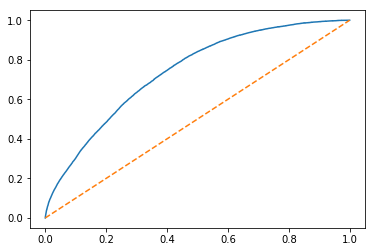

In [62]:
fpr, tpr, threshold = roc_curve(ytest,  soft[:,1])
plt.plot(fpr,tpr, '-')
plt.plot([0,1],[0,1], linestyle='--')
plt.show()

In [63]:
log_loss_feature_engin = log_loss(ytest, soft[:,1]), roc_auc_score(ytest, soft[:,1])
print("Log loss : ", log_loss_feature_engin)

Log loss :  (0.40115516297206244, 0.7385984215044501)


In [64]:
roc_feature_engin = roc_auc_score(ytest, soft[:,1])
print("Area under roc curve : ", roc_feature_engin)

Area under roc curve :  0.7385984215044501


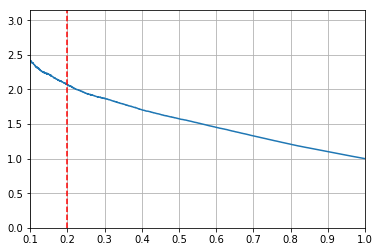

In [65]:
plotlift(ytest, soft[:,1])
plt.axvline(x= 0.2 , linestyle='--', color='r') # Fill here
plt.show()

**Adding our selected features imrpoved our score from 0.83 to 0.83375 => the score is a little bit better but still it is close to predicting full 0**

**The ROC curve is also better, closer to the ideal curve (we can see it because the area under roc curve increased)**

**Has we can see, we improved our lift, it went from 1.8 to 2.1 (approimatly).**

So we did create a better model, but it clan clearly be improved


# Gradient Boosting Decision Trees

<font color="red">**Question 35**:
    <br>
    - Import GradientBoostingClassifier from scikit learn. 
    <br>
    - Initialize it using 50 estimators and a learning rate of 0.8. Set 'verbose=True' to monitor the progress of the algorithm.
    <br>
    - Fit it on the same columns 'cols_to_keep' of Xtrain_oh than for the previous logistic regression.
    <br>
    - Evaluate its performance as in the previous step.
</font>

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(verbose=True, learning_rate=0.8, n_estimators=50, random_state = SEED)
%time gb.fit(Xtrain_oh_filtered,ytrain)

hard = gb.predict(Xtest_oh_filtered)
soft = gb.predict_proba(Xtest_oh_filtered)

hard_score_gb = accuracy_score(ytest, hard)
print("Hard score ", hard_score_gb)

      Iter       Train Loss   Remaining Time 
         1           0.8743            2.81m
         2           0.8646            2.67m
         3           0.8583            2.87m
         4           0.8535            2.79m
         5           0.8503            2.70m
         6           0.8464            2.58m
         7           0.8441            2.51m
         8           0.8418            2.44m
         9           0.8404            2.37m
        10           0.8383            2.30m
        20           0.8282            1.69m
        30           0.8234            1.13m
        40           0.8190           33.80s
        50           0.8163            0.00s
CPU times: user 3min 2s, sys: 16.9 s, total: 3min 19s
Wall time: 2min 49s
Hard score  0.83343


In [67]:
log_loss_gb = log_loss(ytest, soft[:,1])
print("Log loss ", log_loss_gb)

Log loss  0.4091871736006742


In [68]:
roc_gb = roc_auc_score(ytest, soft[:,1])
print("Roc area ", roc_gb)

Roc area  0.7251893509766301


In [69]:
print("Models : ","First colon selected |","Feature selection |", "Gradient Boost")
print("Scores : ",hard_score_selected, "|",hard_score_feature_engin, "|", hard_score_gb)
print("Log loss : ",log_loss_selected, "|",log_loss_feature_engin, "|", log_loss_gb)
print("Roc Area : ",roc_feature_selected, "|",roc_feature_engin, "|", roc_gb)

Models :  First colon selected | Feature selection | Gradient Boost
Scores :  0.83043 | 0.83373 | 0.83343
Log loss :  (0.4251224554680983, 0.6762758103988586) | (0.40115516297206244, 0.7385984215044501) | 0.4091871736006742
Roc Area :  0.6762758103988586 | 0.7385984215044501 | 0.7251893509766301


The gradiant boost model seems less efficient with those parameters than the logistic regression on the feature selected columns 
(area thiner, score also)

<font color="red">**Question 36**:
    What does the 'gb.estimators_' output?
</font>

In [70]:
gb.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x7fb426a49480>,
           splitter='best')],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x7fb426a49480>,
           splitter='best')],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, 

gb_estimators output the parameters of the different model used (here 50). 

We now try to use the 'gb' classifier to generate features that will be relevant inputs for the logistic regression.
<font color="red">**Question 37**:
    With the 'gb.apply()' method, generate a transformation 'leafs_train' of the training set 'Xtrain_oh[:, cols_to_keep]' for which the nth column corresponds to the number of the leaf returned by the estimator n.
</font>

In [71]:
leafs_train = gb.apply(Xtrain_oh_filtered).reshape(Xtrain_oh_filtered.shape[0], 50)
leafs_test = gb.apply(Xtest_oh_filtered).reshape(Xtest_oh_filtered.shape[0], 50)

After your applied gb.apply on Xtrain_oh[:, cols_to_keep], remember that use have only one class to predict (click = 0 or 1). 

In [72]:
print(leafs_test)

[[10.  3.  3. ...  3.  3.  3.]
 [10.  3.  3. ...  3.  3.  3.]
 [ 3.  3.  3. ...  3.  3.  3.]
 ...
 [ 3.  3.  3. ...  3.  3.  3.]
 [ 3.  3.  3. ...  3.  3.  3.]
 [ 3.  3.  3. ...  3.  3.  3.]]


In [73]:
leafs_train = pd.DataFrame(leafs_train) # Fill here
leafs_test = pd.DataFrame(leafs_test)

<font color="red">**Question 38**:
    Encode these new features into dummies.
</font>

In [74]:
ohe = OneHotEncoder(handle_unknown="ignore").fit(leafs_train) # Fill here an argument if needed
leafs_train_oh = ohe.transform(leafs_train)
leafs_test_oh = ohe.transform(leafs_test)

<font color="red">**Question 39**:
    With the "hstack" function, create a new matrix of features by concatenating horizontally our new features "leafs_train_oh" and "leafs_test_oh", and previous features used for logistic regression (e.g. in "Xtrain_oh[:, cols_to_keep]").
</font>
<br><br>
**Remark**: we use "hstack" from scipy.sparse (and not from numpy) because the output of our OneHotEncoder is a sparse array. You can verify it with the command "type(Xtrain_oh)".

In [75]:
from scipy.sparse import csr_matrix, hstack
Xtrain_concat = hstack([ Xtrain_oh_filtered , leafs_train_oh ]) # Fill here
Xtest_concat = hstack([ Xtest_oh_filtered , leafs_test_oh ])

<font color="red">**Question 40**:
    Run a logistic regression on the new features and evaluate its performance as before.
</font>

In [76]:
lr = LogisticRegression(random_state = SEED)
lr.fit(Xtrain_concat,ytrain)
hard = lr.predict(Xtest_concat)
soft = lr.predict_proba(Xtest_concat)

In [77]:
hard_score_gb_leaf = accuracy_score(ytest, hard)
print("Hard score ", hard_score_gb_leaf)

Hard score  0.83406


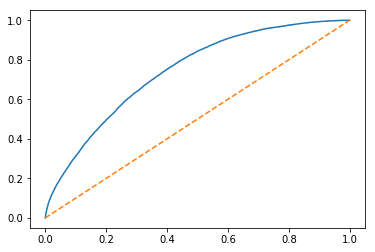

In [78]:
fpr, tpr, threshold = roc_curve(ytest,  soft[:,1])
plt.plot(fpr,tpr, '-')
plt.plot([0,1],[0,1], linestyle='--')
plt.show()


In [79]:
log_loss_gb_leaf = log_loss(ytest, soft[:,1]), roc_auc_score(ytest, soft[:,1])
print("Log loss : ", log_loss_gb_leaf)

Log loss :  (0.39995604824413805, 0.7417361677212378)


In [85]:
roc_gb_leaf = roc_auc_score(ytest, soft[:,1])
print("Area under roc curve : ", roc_gb_leaf)

Area under roc curve :  0.7417361677212378


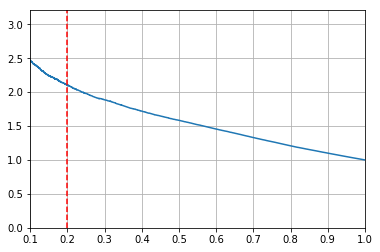

In [84]:
plotlift(ytest, soft[:,1])
plt.axvline(x= 0.2 , linestyle='--', color='r')
plt.show()

In [82]:
print("Models : ","First colon selected |","Feature selection |", "Gradient Boost |", "Gradient Boost leaf|")
print("Scores : ",hard_score_selected, "|",hard_score_feature_engin, "|", hard_score_gb, "|", hard_score_gb_leaf)
print("Log loss : ",log_loss_selected, "|",log_loss_feature_engin, "|", log_loss_gb, "|", log_loss_gb_leaf)
print("Roc Area : ",roc_feature_selected, "|",roc_feature_engin, "|", roc_gb, "|", roc_gb_leaf)

Models :  First colon selected | Feature selection | Gradient Boost | Gradient Boost leaf|
Scores :  0.83043 | 0.83373 | 0.83343 | 0.83406
Log loss :  (0.4251224554680983, 0.6762758103988586) | (0.40115516297206244, 0.7385984215044501) | 0.4091871736006742 | (0.39995604824413805, 0.7417361677212378)
Roc Area :  0.6762758103988586 | 0.7385984215044501 | 0.7251893509766301 | 0.7417361677212378


**Adding those features improved our model, we came from a model weeker than GB but now we have a model predicting better  than GB (looking at score or area under ROC curve)**

<font color="red">**Question 41**:
    <br>
    - Import XGBClassifier from xgboost package.
    <br>
    - Initialize it using the same number of estimators and learning rate as before. 
    <br>
    - Which value of n_jobs did you choose?
    <br>
    - Fit it on the same columns 'cols_to_keep' of Xtrain_oh than for the previous logistic regression.
    <br>
    - Evaluate its performance and compare it to the GradientBoosting classifier of scikit learn. How is the error? Does it take more time to run?
</font>

In [87]:
from xgboost import XGBClassifier
xgb = XGBClassifier(verbose=True, learning_rate=0.8, n_estimators=50, random_state = SEED, n_jobs=-1)
%time xgb.fit(Xtrain_concat,ytrain)

hard = xgb.predict(Xtest_concat)
soft = xgb.predict_proba(Xtest_concat)

hard_score_xgb = accuracy_score(ytest, hard)
print("Hard score ", hard_score_xgb)


CPU times: user 2min 16s, sys: 6.5 s, total: 2min 23s
Wall time: 30.1 s


/home/arnaud/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Hard score  0.83348


In [88]:
log_loss_xgb = log_loss(ytest, soft[:,1])
print("Log loss ", log_loss_xgb)

Log loss  0.4062316573001351


In [89]:
roc_xgb = roc_auc_score(ytest, soft[:,1])
print("Roc area ", roc_xgb)


Roc area  0.7290316623949777


In [90]:
print("Models : ","First colon selected |","Feature selection |", "Gradient Boost |", "Gradient Boost leaf|","XGB")
print("Scores : ",hard_score_selected, "|",hard_score_feature_engin, "|", hard_score_gb, "|", hard_score_gb_leaf,"|", hard_score_xgb)
print("Log loss : ",log_loss_selected, "|",log_loss_feature_engin, "|", log_loss_gb, "|", log_loss_gb_leaf,"|", log_loss_xgb)
print("Roc Area : ",roc_feature_selected, "|",roc_feature_engin, "|", roc_gb, "|", roc_gb_leaf,"|", roc_xgb)

Models :  First colon selected | Feature selection | Gradient Boost | Gradient Boost leaf| XGB
Scores :  0.83043 | 0.83373 | 0.83343 | 0.83406 | 0.83348
Log loss :  (0.4251224554680983, 0.6762758103988586) | (0.40115516297206244, 0.7385984215044501) | 0.4091871736006742 | (0.39995604824413805, 0.7417361677212378) | 0.4062316573001351
Roc Area :  0.6762758103988586 | 0.7385984215044501 | 0.7251893509766301 | 0.7417361677212378 | 0.7290316623949777


**We chose n_jobs = -1 to parallelize our computation, it means use all available ressources (cores) => It gives us a model faster to fit and predict.**

**This new model is a little bit weaker than the gradiant boost associated with the logistic regression but better than the Gb alone (thin difference) regarding to ROC and score**


<font color="red">**Question 42**:
    Increase the number of estimators (e.g. 1024) and visualize the impact on performance. You might have to adapt the learning rate.
</font>

In [91]:
from xgboost import XGBClassifier
xgb2 = XGBClassifier(verbose=True, learning_rate=1, n_estimators=1024, random_state = SEED, n_jobs=-1)
%time xgb2.fit(Xtrain_concat,ytrain)

hard = xgb2.predict(Xtest_concat)
soft = xgb2.predict_proba(Xtest_concat)

hard_score_xgb2 = accuracy_score(ytest, hard)
print("Hard score ", hard_score_xgb2)

CPU times: user 53min 1s, sys: 2min 52s, total: 55min 53s
Wall time: 7min 59s


/home/arnaud/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Hard score  0.83288


In [92]:
log_loss_xgb2 = log_loss(ytest, soft[:,1])
print("Log loss ", log_loss_xgb2)

Log loss  0.4007940014204341


In [93]:
roc_xgb2 = roc_auc_score(ytest, soft[:,1])
print("Roc area ", roc_xgb2)

Roc area  0.7421910018682265


In [94]:
print("Models : ","First colon selected |","Feature selection |", "Gradient Boost |", "Gradient Boost leaf|","XGB","XGB 1024")
print("Scores : ",hard_score_selected, "|",hard_score_feature_engin, "|", hard_score_gb, "|", hard_score_gb_leaf,"|", hard_score_xgb,"|", hard_score_xgb2)
print("Log loss : ",log_loss_selected, "|",log_loss_feature_engin, "|", log_loss_gb, "|", log_loss_gb_leaf,"|", log_loss_xgb,"|", log_loss_xgb2)
print("Roc Area : ",roc_feature_selected, "|",roc_feature_engin, "|", roc_gb, "|", roc_gb_leaf,"|", roc_xgb,"|", roc_xgb2)

Models :  First colon selected | Feature selection | Gradient Boost | Gradient Boost leaf| XGB XGB 1024
Scores :  0.83043 | 0.83373 | 0.83343 | 0.83406 | 0.83348 | 0.83288
Log loss :  (0.4251224554680983, 0.6762758103988586) | (0.40115516297206244, 0.7385984215044501) | 0.4091871736006742 | (0.39995604824413805, 0.7417361677212378) | 0.4062316573001351 | 0.4007940014204341
Roc Area :  0.6762758103988586 | 0.7385984215044501 | 0.7251893509766301 | 0.7417361677212378 | 0.7290316623949777 | 0.7421910018682265


**The ROC curve is the best of all the models, but the score is the worst. Maybe the way of scoring is not the most apropriate.**

**The time taken by the model is aproximatly 16m which is a lot more than the others**

# Features hashing and random forest

We restart with raw features before dummy encoding: Xtrain, Xtest.
<font color="red">**Question 43**:
    Display again the number of modalities per feature in Xtrain.
</font>

In [96]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    df.iloc[:,2:], df['click'], test_size=0.1, random_state = SEED)

In [97]:
print("Number of different element for each feature in Xtrain : \n", Xtrain.nunique())

Number of different element for each feature in Xtrain : 
 hour                    24
C1                       7
banner_pos               7
site_category           22
app_id                3054
app_domain             196
app_category            26
device_type              5
device_conn_type         4
C14                   2225
C15                      8
C16                      9
C17                    420
C18                      4
C19                     66
C20                    163
C21                     60
weekday                  7
user                701585
site                  5442
dtype: int64


In [98]:
print("Number of different element for each feature in Xtest : \n", Xtest.nunique())

Number of different element for each feature in Xtest : 
 hour                   24
C1                      7
banner_pos              7
site_category          19
app_id               1308
app_domain             91
app_category           19
device_type             4
device_conn_type        4
C14                  1733
C15                     8
C16                     9
C17                   400
C18                     4
C19                    64
C20                   157
C21                    60
weekday                 7
user                91546
site                 2199
dtype: int64


We want to define a transformation which regroups the least frequent modalities into a label 'isRare'. In order to do so, we decide to define our own Transformer.
<font color="red">**Question 44**:
    Understand the different steps of 'fit' and 'transform'.
</font>

In [99]:
from sklearn.base import BaseEstimator, TransformerMixin

class MergeRareTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, col_names, threshold):
        self.col_names = col_names
        self.threshold = threshold

    def fit(self, X, y=None):

        X = pd.DataFrame(X)
        counts_dict_list = []
        ################## READ THIS #########################
        for i in range(len(self.col_names)):
            
            serie = X[self.col_names[i]].value_counts()  # Série des counts de chaque modalité
            rare_indexes = serie[serie<self.threshold[i]].index  # A quoi correspondent ces indices ?
            frequent_indexes = serie[serie>=self.threshold[i]].index  # A quoi correspondent ces indices ?
            dico = {x:'isRare' for x in rare_indexes}
            dico.update({x: str(x) for x in frequent_indexes})
            counts_dict_list.append(dico)   # Quel est le dictionnaire obtenu ?
            
        ######################################################
            
        self.counts_dict_list_ = counts_dict_list
        return self

    def transform(self, X):

        Xt = pd.DataFrame()
        ################## READ THIS #########################
        for col, count_dict in zip(self.col_names, self.counts_dict_list_):
            Xt[col] = X[col].apply(lambda x:count_dict[x] if x in count_dict else 'isRare')
            # A quoi sert le "else 'isRare'" dans la transformation de la colonne ?
        ######################################################

        return Xt


**Fit**

rare_indexes : Contains the index of the count of values inferior to the thresold 

frequent_indexes : Contains the index of the count of values superior to the thresold

counts_dict_list : The dictionary will contain either (key:value):

    *index : 'isRare' if the value was selected as rare (value count < threshold)
    
    *index : 'index' (string version of index) if the value was selected as frequent (value count >= threshold)
    
    => So the dict has index : str(index) for the frequent values and index:'isRare' for the rare

**Transform**

The else case is here in the case the value is not in the dictionary (which has been fited before), so it means it's a rare value
    



<font color="red">**Question 45:**
    <br>
    - Fit and transform the training set. To do so, merge all mmodalities occuring at least 20 times in each column.
    <br>
    - Transform the test set.
</font>

In [100]:
mg = MergeRareTransformer(col_names=Xtrain.columns, threshold=[20]*len(Xtrain.columns))
Xtrain_mg = mg.fit_transform(Xtrain) # Fill here with fit_transform or fit then transform.
Xtest_mg = mg.transform(Xtest)

<font color="red">**Question 46:**
   How many elements of the column Xtrain_mg['app_domain'] are now labeled as 'rare'?
</font>

In [101]:
nb_rare_app_domain = Xtrain_mg[Xtrain_mg['app_domain'] == 'isRare'].shape[0]
print("Number of lines labelled as rare in the app domain column ",nb_rare_app_domain)

Number of lines labelled as rare in the app domain column  513


**There is 513 out of 100000 values which occurs less than 400 times (20*20)**

<font color="red">**Question 47:**
   In the new train set, display the number of modalities for each feature.
</font>

In [102]:
nb_modalities_features = Xtrain_mg.nunique()
print("The number of different modalities per features is (minus one because of the rare values) : \n", nb_modalities_features)

The number of different modalities per features is (minus one because of the rare values) : 
 hour                  24
C1                     7
banner_pos             7
site_category         18
app_id               613
app_domain            53
app_category          19
device_type            5
device_conn_type       4
C14                 1339
C15                    8
C16                    9
C17                  381
C18                    4
C19                   63
C20                  148
C21                   60
weekday                7
user                 901
site                 889
dtype: int64


Modalities are arbitrary object, such as '234', 'isRare', etc. We will now transorm them into integers with the hashing trick.
<font color="red">**Question 48:**
   To better understand how the 'hash' function is working, apply it to a string of your choice.
</font>

In [103]:
import hashlib
hash("TEST") # Fill here

-3979796979921764777

**A Hashing function use most of the time an injective function (we cannot come back from the hashed value to the original one) generating a value of always the same size. It is often used in security (store password on a server from instance where you compare the value hash of the pass entered by the user to the hash stored in database). Here the hash seem to generate an int value**

<font color="red">**Question 49:**
   Create two new datasets 'Xtrain_ha' and 'Xtest_ha' containing the output of the hashing process. Use the '.apply' method to transform iteratively the columns by mapping to each value its remainder in the euclidean division of the hash by 1000000. 
   Example:
</font>
</font>
<p>
<center>
2060777048690<font color="red">918393</font>  -->  918393
</center>
Remark: do not forget that the function 'hash' has to take a string as input.

In [104]:
Xtrain_ha = pd.DataFrame()
Xtest_ha = pd.DataFrame()
for col in Xtrain_mg.columns:
    Xtrain_ha[col] = Xtrain_mg[col].apply(lambda x : hash(x)%1000000) # Fill here defining a lambda function
    Xtest_ha[col] = Xtest_mg[col].apply(lambda x : hash(x)%1000000)

<font color="red">**Question 50:**
   Visualize the content of the DataFrames you have obtained.
</font>

In [105]:
Xtrain_ha

,hour,C1,banner_pos,site_category,app_id,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday,user,site
92438,375430,123099,349553,877399,557830,876244,440643,514253,900964,632806,531840,638544,123173,654057,661294,364246,224868,654057,870861,499676
60898,903358,268606,654057,877399,377863,691495,196724,349553,953823,632806,531840,638544,123173,654057,661294,364246,224868,349553,870861,499676
556199,514253,268606,654057,212980,20209,876244,288164,349553,953823,233380,531840,638544,361431,654057,647404,364246,202768,654057,870861,221133
193129,527908,268606,349553,212980,20209,876244,288164,349553,654057,47728,531840,638544,139395,654057,999024,141170,31791,349553,870861,523160
231985,655329,268606,654057,967046,20209,876244,288164,349553,654057,398473,531840,638544,123173,654057,661294,792962,224868,785163,870861,35932
235945,900964,268606,349553,212980,20209,876244,288164,349553,654057,490884,531840,638544,728068,953823,658279,364246,219437,514253,870861,658863
622676,900538,268606,654057,967046,20209,876244,288164,349553,654057,293988,531840,638544,123173,654057,661294,792962,224868,953823,870861,35932
426950,184880,268606,654057,819663,20209,876244,288164,349553,654057,12508,531840,638544,407940,900964,486430,141170,306731,835245,870861,669929
115855,349553,268606,349553,212980,20209,876244,288164,349553,654057,772667,531840,638544,947909,654057,297699,364246,665304,953823,870861,457015
594467,191563,268606,654057,967046,20209,876244,288164,349553,654057,398473,531840,638544,123173,654057,661294,792962,224868,654057,870861,35932


In [106]:
Xtest_ha

,hour,C1,banner_pos,site_category,app_id,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday,user,site
617759,785163,268606,349553,212980,20209,876244,288164,349553,654057,313780,531840,638544,254918,953823,297699,364246,822964,900964,870861,832372
693227,375430,268606,654057,967046,20209,876244,288164,349553,654057,205739,531840,638544,712429,953823,451756,972731,608978,953823,870861,860737
906065,900538,268606,349553,212980,20209,876244,288164,349553,654057,137242,531840,638544,517585,900964,661294,367805,655329,835245,870861,523160
828507,785163,268606,654057,877399,824116,691495,440643,349553,654057,731284,531840,638544,127822,900964,405938,608800,750964,900964,870861,499676
869730,375430,485564,654057,877399,20209,876244,288164,654057,654057,922008,531840,638544,596154,953823,297699,364246,822964,953823,870861,988158
147081,900538,268606,349553,212980,20209,876244,288164,349553,654057,927541,531840,638544,999081,900964,292409,423794,818456,785163,870861,533643
779428,184880,268606,654057,877399,729896,504206,440643,349553,953823,81109,531840,638544,648418,654057,661294,364246,995114,953823,870861,499676
485973,835245,268606,654057,212980,20209,876244,288164,349553,654057,475726,531840,638544,310918,654057,661294,807966,665304,953823,870861,749783
30697,448589,268606,349553,212980,20209,876244,288164,349553,654057,294617,531840,638544,999081,900964,292409,423794,818456,785163,870861,832372
306669,375430,268606,654057,877399,932523,691495,854896,349553,953823,23315,531840,638544,625743,654057,378222,20187,31791,900964,870861,499676


<font color="red">**Question 51:**
    <br>
    - Train a RandomForestClassifier on Xtrain_ha and evaluate its performance on Xtest_ha. One can chose 1024 estimators, min_samples_leaf=20 and verbose=1 in order to monitor the fitting step.
    <br>
</font>

In [107]:
from sklearn.ensemble import RandomForestClassifier # Fill here
rf = RandomForestClassifier(n_jobs = -1, n_estimators = 1024, min_samples_leaf=20, verbose=1, random_state=SEED)
rf.fit(Xtrain_ha,ytrain)

hard = rf.predict(Xtest_ha)
soft = rf.predict_proba(Xtest_ha)

hard_score_rf = accuracy_score(ytest, hard)
print("Hard score ", hard_score_rf)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 1024 out of 1024 | elapsed: 14.0min finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done 1024 out of 1024 | elapsed:    4.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    3.4s


Hard score  0.83371


[Parallel(n_jobs=8)]: Done 1024 out of 1024 | elapsed:    4.3s finished


In [108]:
log_loss_rf = log_loss(ytest, soft[:,1])
print("Log loss ", log_loss_rf)

Log loss  0.40123498917125194


In [109]:
roc_rf = roc_auc_score(ytest, soft[:,1])
print("Roc area ", roc_rf)


Roc area  0.740417139411209


In [110]:
print("Models : ","First colon selected |","Feature selection |", "Gradient Boost |", "Gradient Boost leaf|","XGB","XGB 1024|","RF")
print("Scores : ",hard_score_selected, "|",hard_score_feature_engin, "|", hard_score_gb, "|", hard_score_gb_leaf,"|", hard_score_xgb,"|", hard_score_xgb2,"|", hard_score_rf)
print("Log loss : ",log_loss_selected, "|",log_loss_feature_engin, "|", log_loss_gb, "|", log_loss_gb_leaf,"|", log_loss_xgb,"|", log_loss_xgb2,"|", log_loss_rf)
print("Roc Area : ",roc_feature_selected, "|",roc_feature_engin, "|", roc_gb, "|", roc_gb_leaf,"|", roc_xgb,"|", roc_xgb2,"|", roc_rf)

Models :  First colon selected | Feature selection | Gradient Boost | Gradient Boost leaf| XGB XGB 1024| RF
Scores :  0.83043 | 0.83373 | 0.83343 | 0.83406 | 0.83348 | 0.83288 | 0.83371
Log loss :  (0.4251224554680983, 0.6762758103988586) | (0.40115516297206244, 0.7385984215044501) | 0.4091871736006742 | (0.39995604824413805, 0.7417361677212378) | 0.4062316573001351 | 0.4007940014204341 | 0.40123498917125194
Roc Area :  0.6762758103988586 | 0.7385984215044501 | 0.7251893509766301 | 0.7417361677212378 | 0.7290316623949777 | 0.7421910018682265 | 0.740417139411209


The results are close than those random forest and xgboost gave on the last set of features, yet the Random Forest perform a bit weeker than those 2

<font color="red">**Question 52:**
   Compare with xgboost performance on the same hashed dataset.
</font>

In [111]:
xgb_hash = XGBClassifier(verbose=True, learning_rate=1, n_estimators=1024, random_state = SEED, n_jobs=-1)

%time xgb_hash.fit(Xtrain_concat,ytrain)# the '%time' command will return the execution time of the fitting step

hard = xgb_hash.predict(Xtest_concat)
soft = xgb_hash.predict_proba(Xtest_concat)

hard_score_xgb_hash = accuracy_score(ytest, hard)
print("Hard score ", hard_score_xgb_hash)

CPU times: user 48min 54s, sys: 1min 46s, total: 50min 41s
Wall time: 6min 53s


/home/arnaud/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Hard score  0.83288


In [112]:
log_loss_xgb_hash = log_loss(ytest, soft[:,1])
print("Log loss ", log_loss_xgb_hash)

Log loss  0.4007940014204341


In [113]:
roc_xgb_hash = roc_auc_score(ytest, soft[:,1])
print("Roc area ", roc_xgb_hash)


Roc area  0.7421910018682265


In [114]:
print("Models : ","First colon selected |","Feature selection |", "Gradient Boost |", "Gradient Boost leaf|","XGB","XGB 1024","RF","XGB hash")
print("Scores : ",hard_score_selected, "|",hard_score_feature_engin, "|", hard_score_gb, "|", hard_score_gb_leaf,"|", hard_score_xgb,"|", hard_score_xgb2,"|", hard_score_rf,"|", hard_score_xgb_hash)
print("Log loss : ",log_loss_selected, "|",log_loss_feature_engin, "|", log_loss_gb, "|", log_loss_gb_leaf,"|", log_loss_xgb,"|", log_loss_xgb2,"|", log_loss_rf,"|", log_loss_xgb_hash)
print("Roc Area : ",roc_feature_selected, "|",roc_feature_engin, "|", roc_gb, "|", roc_gb_leaf,"|", roc_xgb,"|", roc_xgb2,"|", roc_rf,"|", roc_xgb_hash)

Models :  First colon selected | Feature selection | Gradient Boost | Gradient Boost leaf| XGB XGB 1024 RF XGB hash
Scores :  0.83043 | 0.83373 | 0.83343 | 0.83406 | 0.83348 | 0.83288 | 0.83371 | 0.83288
Log loss :  (0.4251224554680983, 0.6762758103988586) | (0.40115516297206244, 0.7385984215044501) | 0.4091871736006742 | (0.39995604824413805, 0.7417361677212378) | 0.4062316573001351 | 0.4007940014204341 | 0.40123498917125194 | 0.4007940014204341
Roc Area :  0.6762758103988586 | 0.7385984215044501 | 0.7251893509766301 | 0.7417361677212378 | 0.7290316623949777 | 0.7421910018682265 | 0.740417139411209 | 0.7421910018682265


This model is equivalent in terms of the differents scores than the xgboost we tried on the last set of features, both ranking at the first place as of now

<font color="red">**Question 53:**
    Plot the ROC and the lift curves for the obtained classifier (xgboost on hashed data).
</font>

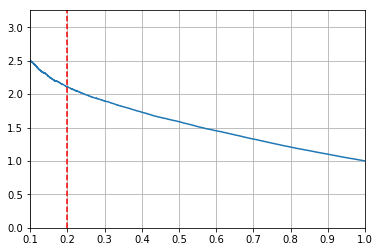

In [115]:
# Plot the lift curve here
plotlift(ytest, soft[:,1])
plt.axvline(x= 0.2 , linestyle='--', color='r')

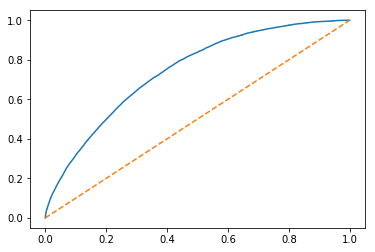

In [116]:
# Plot the ROC curve here
fpr, tpr, threshold = roc_curve(ytest,  soft[:,1])
plt.plot(fpr,tpr, '-')
plt.plot([0,1],[0,1], linestyle='--')
plt.show()

Hashing produces columns of integers arbitrarily ordered. One can wonder if adding more columns hashed in a different fashion would lead to better performance. 
<font color="red">**Question 54:**
    Add hashed columns by recursively hashing the previous ones: complete the following code. 
</font>

In [117]:
Xtrain_haha = pd.DataFrame(Xtrain_ha).copy()
Xtest_haha = pd.DataFrame(Xtest_ha).copy()

n_hash = 3
cols = Xtrain_ha.columns
for l in range(n_hash):
    for col in cols:
        Xtrain_haha[col + '-hash'] = Xtrain_haha[col].apply(lambda x: hash(x)%1000000)
        Xtest_haha[col + '-hash'] = Xtest_haha[col].apply(lambda x: hash(x)%1000000)
    cols = [col + '-hash' for col in cols]

<font color="red">**Question 55:**
    Evaluate the performance of a random forest and/or an xgboost clasifier on these enlarged dataset.
</font>

In [118]:
rf2 = RandomForestClassifier(n_jobs = -1, n_estimators = 1024, min_samples_leaf=20, verbose=1, random_state=SEED)
rf2.fit(Xtrain_haha,ytrain)

hard = rf2.predict(Xtest_haha)
soft = rf2.predict_proba(Xtest_haha)

hard_score_rf2 = accuracy_score(ytest, hard)
print("Hard score ", hard_score_rf2)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 1024 out of 1024 | elapsed: 24.3min finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    6.5s
[Parallel(n_jobs=8)]: Done 1024 out of 1024 | elapsed:    8.4s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    6.5s


Hard score  0.83426


[Parallel(n_jobs=8)]: Done 1024 out of 1024 | elapsed:    8.5s finished


In [122]:
log_loss_rf2 = log_loss(ytest, soft[:,1])
print("Log loss ", log_loss_rf2)

Log loss  0.4000100772399178


In [123]:
roc_rf2 = roc_auc_score(ytest, soft[:,1])
print("Roc area ", roc_rf2)


Roc area  0.7417576571483954


In [124]:
print("Models : ","First colon selected |","Feature selection |", "Gradient Boost |", "Gradient Boost leaf|","XGB|","XGB 1024|","RF|","RF Enlarged")
print("Scores : ",hard_score_selected, "|",hard_score_feature_engin, "|", hard_score_gb, "|", hard_score_gb_leaf,"|", hard_score_xgb,"|", hard_score_xgb2,"|", hard_score_rf,"|", hard_score_rf2)
print("Log loss : ",log_loss_selected, "|",log_loss_feature_engin, "|", log_loss_gb, "|", log_loss_gb_leaf,"|", log_loss_xgb,"|", log_loss_xgb2,"|", log_loss_rf,"|", log_loss_rf2)
print("Roc Area : ",roc_feature_selected, "|",roc_feature_engin, "|", roc_gb, "|", roc_gb_leaf,"|", roc_xgb,"|", roc_xgb2,"|", roc_rf,"|", roc_rf2)

Models :  First colon selected | Feature selection | Gradient Boost | Gradient Boost leaf| XGB| XGB 1024| RF| RF Enlarged
Scores :  0.83043 | 0.83373 | 0.83343 | 0.83406 | 0.83348 | 0.83288 | 0.83371 | 0.83426
Log loss :  (0.4251224554680983, 0.6762758103988586) | (0.40115516297206244, 0.7385984215044501) | 0.4091871736006742 | (0.39995604824413805, 0.7417361677212378) | 0.4062316573001351 | 0.4007940014204341 | 0.40123498917125194 | 0.4000100772399178
Roc Area :  0.6762758103988586 | 0.7385984215044501 | 0.7251893509766301 | 0.7417361677212378 | 0.7290316623949777 | 0.7421910018682265 | 0.740417139411209 | 0.7417576571483954


**The RF on the enlarged dataset gave us the best result amongh them all (loss, accuracy, 2nd best ROC Area). It seem that hashing recursively the data 4 times helped us to to create features more usefull for our classifier.**

<font color="red">**Question 55:**
    Compare the different models used in the TP.
</font>

All in all, it seems the last set of features on the enlarged dataset, hashing recursively the data, gave us the most optimised model. At each step, we learned something on the dataset, which allowed us to improve each time